In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
import requests
requests.__version__

'2.24.0'

In [7]:
city_data = []

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32312c6a6ec7424454be63618bbc66df


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 13 | hermanus
Processing Record 2 of Set 13 | riaba
Processing Record 3 of Set 13 | busselton
Processing Record 4 of Set 13 | arraial do cabo
Processing Record 5 of Set 13 | hami
Processing Record 6 of Set 13 | hithadhoo
Processing Record 7 of Set 13 | hobart
Processing Record 8 of Set 13 | ardakan
Processing Record 9 of Set 13 | carutapera
Processing Record 10 of Set 13 | zaysan
Processing Record 11 of Set 13 | anchorage
Processing Record 12 of Set 13 | new norfolk
Processing Record 13 of Set 13 | port elizabeth
Processing Record 14 of Set 13 | ayan
Processing Record 15 of Set 13 | nizhniy lomov
Processing Record 16 of Set 13 | darhan
Processing Record 17 of Set 13 | valley city
Processing Record 18 of Set 13 | vila velha
Processing Record 19 of Set 13 | yellowknife
Processing Record 20 of Set 13 | tulle
Processing Record 21 of Set 13 | lasa
Processing Record 22 of Set 13 | chuy
Processing Record 23 of Set 13 | butaritari
Processing Record 24 of Set 13 | sou

In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 37 of Set 25 | hermanus
Processing Record 38 of Set 25 | riaba
City not found. Skipping...
Processing Record 39 of Set 25 | busselton
Processing Record 40 of Set 25 | arraial do cabo
Processing Record 41 of Set 25 | hami
Processing Record 42 of Set 25 | hithadhoo
Processing Record 43 of Set 25 | hobart
Processing Record 44 of Set 25 | ardakan
Processing Record 45 of Set 25 | carutapera
Processing Record 46 of Set 25 | zaysan
Processing Record 47 of Set 25 | anchorage
Processing Record 48 of Set 25 | new norfolk
Processing Record 49 of Set 25 | port elizabeth
Processing Record 50 of Set 25 | ayan
Processing Record 51 of Set 25 | nizhniy lomov
Processing Record 52 of Set 25 | darhan
Processing Record 53 of Set 25 | valley city
Processing Record 54 of Set 25 | vila velha
Processing Record 55 of Set 25 | yellowknife
Processing Record 56 of Set 25 | tulle
Processing Record 57 of Set 25 | lasa
Processing Record 58 of Set 25 | chuy
Processing Record 59 of Set 25 | butaritari

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,66.00,63,57,1.99,ZA,2021-03-27 15:24:19
1,Busselton,-33.6500,115.3333,59.00,83,60,8.95,AU,2021-03-27 15:24:20
2,Arraial Do Cabo,-22.9661,-42.0278,91.40,62,0,13.80,BR,2021-03-27 15:24:20
3,Hami,42.8000,93.4500,58.35,41,100,7.45,CN,2021-03-27 15:24:20
4,Hithadhoo,-0.6000,73.0833,83.68,72,93,10.42,MV,2021-03-27 15:24:21
5,Hobart,-42.8794,147.3294,53.60,71,75,11.50,AU,2021-03-27 15:20:22
6,Ardakan,32.3100,54.0175,86.00,12,20,16.11,IR,2021-03-27 15:24:21
7,Carutapera,-1.1950,-46.0200,74.32,95,100,4.00,BR,2021-03-27 15:24:21
8,Zaysan,47.4667,84.8667,35.17,96,91,3.53,KZ,2021-03-27 15:24:22
9,Anchorage,61.2181,-149.9003,23.00,68,90,3.44,US,2021-03-27 15:19:48


In [16]:
city_data_df = city_data_df [["City", "Country", "Date","Lat", "Lng", "Max Temp", 
                              "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-03-27 15:24:19,-34.4187,19.2345,66.00,63,57,1.99
1,Busselton,AU,2021-03-27 15:24:20,-33.6500,115.3333,59.00,83,60,8.95
2,Arraial Do Cabo,BR,2021-03-27 15:24:20,-22.9661,-42.0278,91.40,62,0,13.80
3,Hami,CN,2021-03-27 15:24:20,42.8000,93.4500,58.35,41,100,7.45
4,Hithadhoo,MV,2021-03-27 15:24:21,-0.6000,73.0833,83.68,72,93,10.42
...,...,...,...,...,...,...,...,...,...
573,Teguldet,RU,2021-03-27 15:27:01,57.3064,88.1667,28.98,93,100,6.93
574,Jahanabad,IN,2021-03-27 15:27:01,25.2167,84.9833,75.20,35,0,5.12
575,Scarborough,GB,2021-03-27 15:27:02,54.2797,-0.4044,48.99,56,93,4.00
576,Mopti,ML,2021-03-27 15:27:02,14.6667,-4.0000,102.20,8,2,16.11


In [17]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        578 non-null    object 
 1   Country     578 non-null    object 
 2   Date        578 non-null    object 
 3   Lat         578 non-null    float64
 4   Lng         578 non-null    float64
 5   Max Temp    578 non-null    float64
 6   Humidity    578 non-null    int64  
 7   Cloudiness  578 non-null    int64  
 8   Wind Speed  578 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 40.8+ KB


In [18]:
city_data_df.count

<bound method DataFrame.count of                 City Country                 Date      Lat       Lng  \
0           Hermanus      ZA  2021-03-27 15:24:19 -34.4187   19.2345   
1          Busselton      AU  2021-03-27 15:24:20 -33.6500  115.3333   
2    Arraial Do Cabo      BR  2021-03-27 15:24:20 -22.9661  -42.0278   
3               Hami      CN  2021-03-27 15:24:20  42.8000   93.4500   
4          Hithadhoo      MV  2021-03-27 15:24:21  -0.6000   73.0833   
..               ...     ...                  ...      ...       ...   
573         Teguldet      RU  2021-03-27 15:27:01  57.3064   88.1667   
574        Jahanabad      IN  2021-03-27 15:27:01  25.2167   84.9833   
575      Scarborough      GB  2021-03-27 15:27:02  54.2797   -0.4044   
576            Mopti      ML  2021-03-27 15:27:02  14.6667   -4.0000   
577  Sfantu Gheorghe      RO  2021-03-27 15:24:38  45.8667   25.7833   

     Max Temp  Humidity  Cloudiness  Wind Speed  
0       66.00        63          57        1.99  
1 

In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

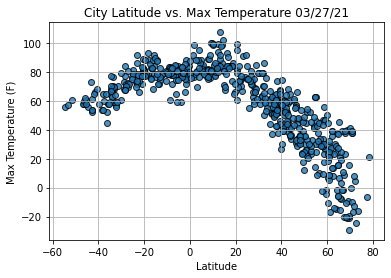

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

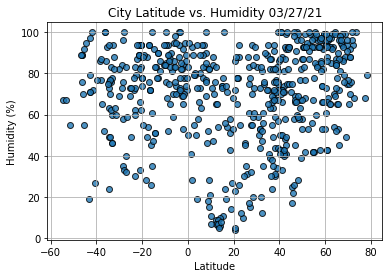

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

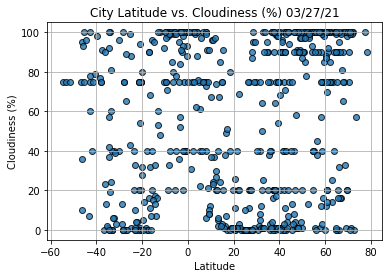

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

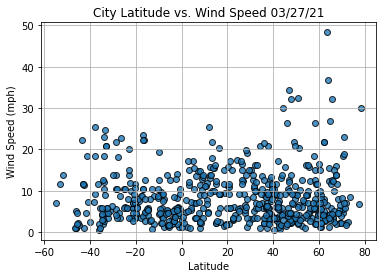

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
city_data_df = pd.read_csv("weather_data/cities.csv")

In [27]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                Nizhniy Lomov
Country                        RU
Date          2021-03-27 15:24:23
Lat                       53.5304
Lng                       43.6766
Max Temp                    33.04
Humidity                       99
Cloudiness                    100
Wind Speed                   7.34
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
573     True
574     True
575     True
576     True
577     True
Name: Lat, Length: 578, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,3,Hami,CN,2021-03-27 15:24:20,42.8000,93.4500,58.35,41,100,7.45
6,6,Ardakan,IR,2021-03-27 15:24:21,32.3100,54.0175,86.00,12,20,16.11
8,8,Zaysan,KZ,2021-03-27 15:24:22,47.4667,84.8667,35.17,96,91,3.53
9,9,Anchorage,US,2021-03-27 15:19:48,61.2181,-149.9003,23.00,68,90,3.44
12,12,Ayan,RU,2021-03-27 15:24:22,56.4500,138.1667,10.15,96,100,5.23
...,...,...,...,...,...,...,...,...,...,...
573,573,Teguldet,RU,2021-03-27 15:27:01,57.3064,88.1667,28.98,93,100,6.93
574,574,Jahanabad,IN,2021-03-27 15:27:01,25.2167,84.9833,75.20,35,0,5.12
575,575,Scarborough,GB,2021-03-27 15:27:02,54.2797,-0.4044,48.99,56,93,4.00
576,576,Mopti,ML,2021-03-27 15:27:02,14.6667,-4.0000,102.20,8,2,16.11


In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,3,Hami,CN,2021-03-27 15:24:20,42.8000,93.4500,58.35,41,100,7.45
6,6,Ardakan,IR,2021-03-27 15:24:21,32.3100,54.0175,86.00,12,20,16.11
8,8,Zaysan,KZ,2021-03-27 15:24:22,47.4667,84.8667,35.17,96,91,3.53
9,9,Anchorage,US,2021-03-27 15:19:48,61.2181,-149.9003,23.00,68,90,3.44
12,12,Ayan,RU,2021-03-27 15:24:22,56.4500,138.1667,10.15,96,100,5.23


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

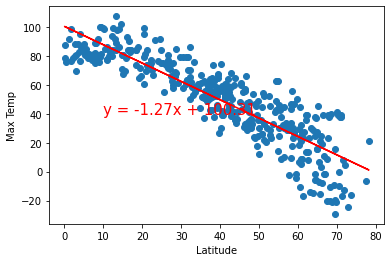

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

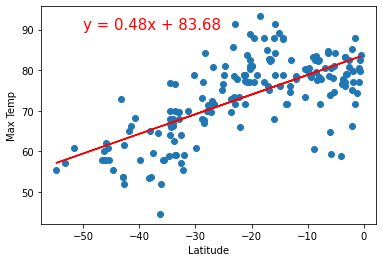

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

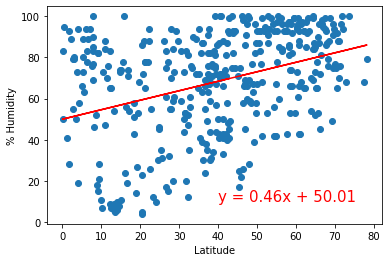

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

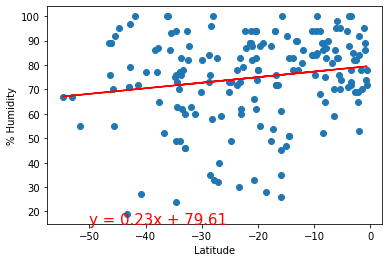

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

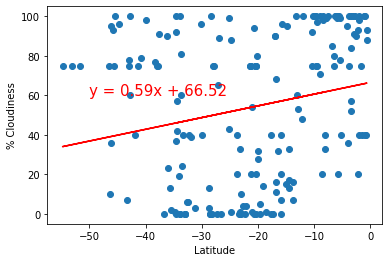

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

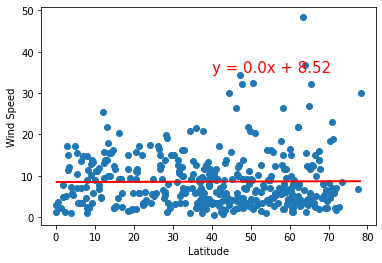

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

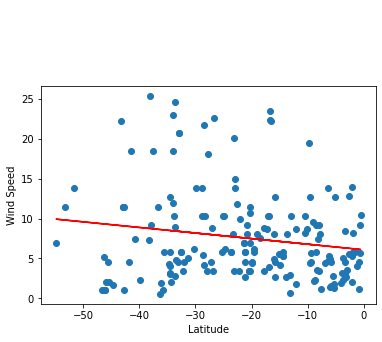

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))